In [1]:
#0.0 timing functions

import time
time_start = time.process_time()
#run your code
x=[1]
for a in range(0,300):
    x.append(1)
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

Run time: 0.000 s


In [2]:
#1.a) convolution moving average
def myconvu(base,sys):
    limitb = len(base)
    limits = len(sys)
    out=[0]*len(base)
    ave = 0
    
    i= 0

    while i < limitb:
        j = 0
        while j < limits:
            if ((i-j)<len(base)) and ((i-j)>0):
                out[i]+= sys[j]*base[i-j]
            j+=1
        i+=1
    return out


In [3]:
#testing function
import numpy as np 
import matplotlib.pyplot as plt

wave =[0]*500
i = 0
while i < 500:
    if (i >= 200) and (i <= 299):
        wave[i] = 1
    i+=1

noise = np.random.uniform(-0.6,0.6,500)
wave1 =[0]*500
i = 0
while i < 500:
    wave1[i]=noise[i]+wave[i]
    i+=1
    
delta=[0,1,2,3,4,5]

h=myconvu(wave,delta)

plt.plot(wave)
plt.plot(h)
plt.show()
h=np.convolve(wave,delta)
plt.plot(wave)
plt.plot(h)

<Figure size 640x480 with 1 Axes>

In [4]:
#1.b) making filters
def low_square(length):
    total = 1
    out=[0]*length
    size = total/length
    i = 0
    while i < length:
        out[i]=size
        i+=1
    return out

def high_square(length):
    total = 1
    total1=0
    out=[0]*length
    center = round((length)/2)
    size = total/length
    i = 0
    while i < length:
        #flip
        if (i != center):
            out[i]=(-1)*size
            total1+=out[i]
        i+=1
    out[center]=(-1)* total1
    return out
#exp filters
def low_exp(length):
    total = 1
    out = [0]*length
    i = 0
    while i < length:
        out[i]=np.exp(length-i)
        i+=1
    totalout = np.sum(out)
    j = 0
    while j < length:
        out[j]=out[j]/totalout
        j+=1
    return out

def high_exp(length):
    total = 1
    out = [0]*length
    i = 0
    while i < length:
        out[i]=np.exp(length-i)
        i+=1
    totalout = np.sum(out)
    j = 0
    while j < length:
        out[j]=out[j]/totalout
        j+=1
        
    j = 0
    while j < length:
        out[j]=out[j]*(-1)
        j+=1
    out[0]=np.sum(out[1:])*(-1)
    return out
    
#sinc filters needs to be odd for best effect
def low_sinc(length):
    #using np.sinc funtion to generate sinc linit -pi to pi
    #should be odd and large to give good resolution
    x = np.linspace(-4,4, num =length)
    sinc = np.sinc(x)
    norm = np.sum(sinc)
    i = 0
    out = [0]*length
    
    while i < length:
        out[i]=sinc[i]/norm
        i+=1
    
    return out
    
def high_sinc(length):
    #using np.sinc funtion to generate sinc linit -pi to pi
    #should be odd and large to give good resolution
    x = np.linspace(-4,4, num =length)
    sinc = np.sinc(x)
    norm = np.sum(sinc)
    i = 0
    out = [0]*length
    center = round(length/2)
    while i < length:
        if(sinc[i] != 1):
            out[i]=sinc[i]/norm*(-1)
        elif(sinc[i] == 1):
            center = i
        i+=1
    out[center]= (-1)*np.sum(out)
    return out

-2.5336331394389677e-17


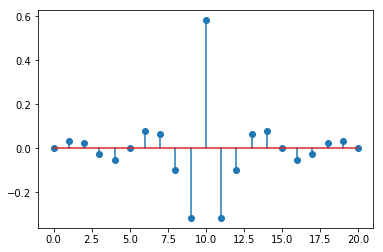

In [5]:
#cell for testing functions
x = np.arange(-20,20,1)

s = high_sinc(21)
plt.stem(s)
print(np.sum(s))

In [1]:
#c)generate noisy square wave
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

noise = np.random.uniform(-0.3,0.3,1000)
#wave
t = np.linspace(0, 1, 1000, endpoint=False)
wave = signal.square(2 * np.pi * 5 * t) +noise
plt.plot(t, wave)
plt.ylim(-2, 2)
plt.show()

<Figure size 640x480 with 1 Axes>

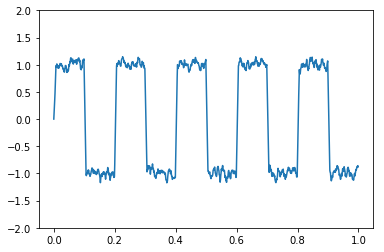

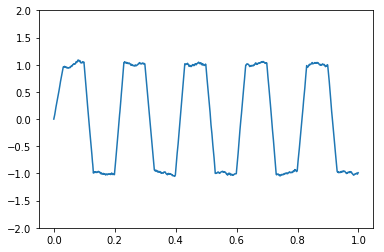

In [7]:
#d)using square filters
filter1 = low_square(7)
filter2 = low_square(31)
wave1 = myconvu(wave,filter1)
plt.plot(t, wave1)
plt.ylim(-2, 2)
plt.show()

wave2= myconvu(wave,filter2)
plt.plot(t, wave2)
plt.ylim(-2, 2)
plt.show()

#with 31 kernals the noise is reduce more but the reponse of the wave is slowed (created a slope)
#7 kernals noise is larger but wave maintianed more of it's shape

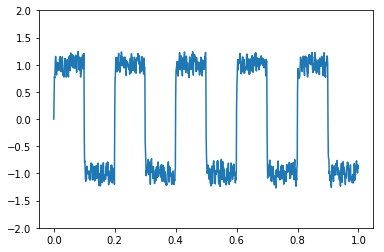

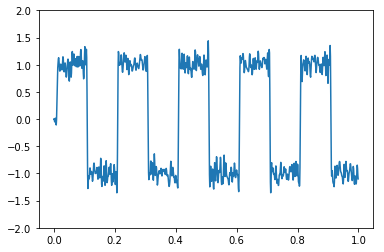

In [8]:
#e)sinc and exp filters
filter3 = low_exp(21)
filter4 = low_sinc(21)
wave3 = myconvu(wave,filter3)
plt.plot(t, wave3)
plt.ylim(-2, 2)
plt.show()

wave4= myconvu(wave,filter4)
plt.plot(t, wave4)
plt.ylim(-2, 2)
plt.show()

#both wwave maintianed more of the shape of the wave with reduced noise
#the since wave seems to more effective than exp

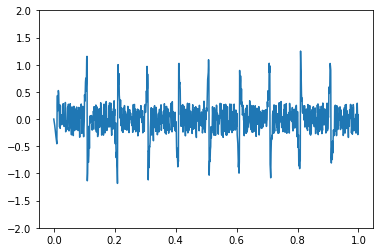

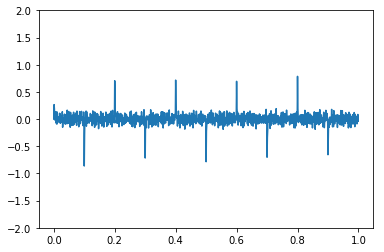

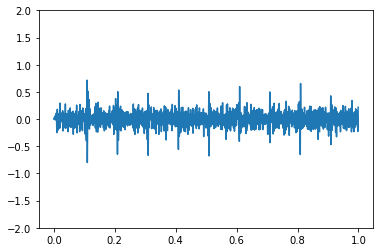

In [9]:
#f)high filters
filter1h = high_square(21)
filter2h = high_exp(21)
filter3h = high_sinc(21)

wave1h = myconvu(wave,filter1h)
wave2h = myconvu(wave,filter2h)
wave3h = myconvu(wave,filter3h)

plt.plot(t, wave1h)
plt.ylim(-2, 2)
plt.show()
plt.plot(t, wave2h)
plt.ylim(-2, 2)
plt.show()
plt.plot(t, wave3h)
plt.ylim(-2, 2)
plt.show()

#The high pass filters made it hard to tell that this use to be a square wave
#from most to least noisy square > sinc > exp
#still can tell the high and low points of the square wave from the filtterd signals

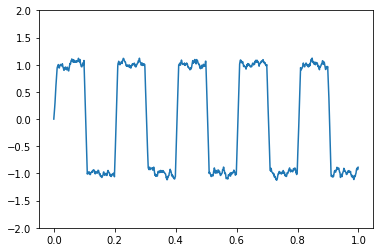

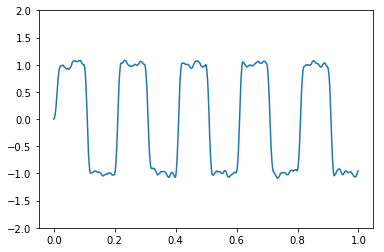

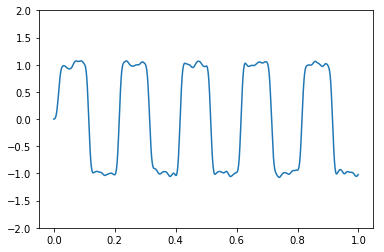

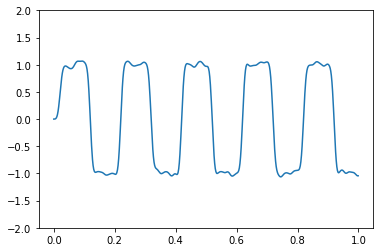

In [11]:
#g) filtering it 4 times
filter1l = low_square(11)

wave1l = myconvu(wave,filter1l)
plt.plot(t, wave1l)
plt.ylim(-2, 2)
plt.show()

wave2l = myconvu(wave1l,filter1l)
plt.plot(t, wave2l)
plt.ylim(-2, 2)
plt.show()

wave3l = myconvu(wave2l,filter1l)
plt.plot(t, wave3l)
plt.ylim(-2, 2)
plt.show()

wave4l = myconvu(wave3l,filter1l)
plt.plot(t, wave4l)
plt.ylim(-2, 2)
plt.show()

#the filter wave becomes smoother and more rounded with every run

In [12]:
#2. music notes
B = 246.94 #Hz
C = 261.63 #Hz
D = 293.66 #Hz
E = 329.63 #Hz
F = 349.23 #Hz
G = 392.00 #Hz
A = 440.00 #Hz

54546 54546 54546 54546


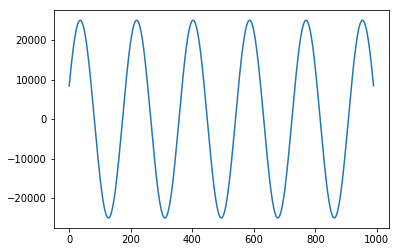

In [13]:
#a) produce seven waves 
#same parts of wave
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

#basics
amp = 25000
fs = 48000
Ts=1/fs
cycle = 500
#Period need to be varied to ensure same amount of samples
#variable
B = 246.94 #Hz
C = 261.63 #Hz
D = 293.66 #Hz
E = 329.63 #Hz
F = 349.23 #Hz
G = 392.00 #Hz
A = 440.00 #Hz
#Build signal
#A
f=A
T=1/f
#smalest T keep mantian sample size
t=np.arange(0,cycle*T,Ts)
signalA=amp*np.sin(2*np.pi*f*t)

#B 
f=B
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalB=amp*np.sin(2*np.pi*f*t)
#C
f=C
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalC=amp*np.sin(2*np.pi*f*t)
#D
f=D
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalD=amp*np.sin(2*np.pi*f*t)
#E
f=E
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalE=amp*np.sin(2*np.pi*f*t)
#F
f=F
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalF=amp*np.sin(2*np.pi*f*t)
#G
f=G
#T=1/f

t=np.arange(0,cycle*T,Ts)
signalG=amp*np.sin(2*np.pi*f*t)

#test to see generated wave
plt.plot(signalC[10:1000])
print(len(signalC),len(signalB),len(signalA),len(signalF))

In [14]:
#b)
#need to covert to int16 array
Cwave = np.asarray(signalC,dtype=np.int16)
wavfile.write("C.wav",fs,Cwave)
IPython.display.Audio("C.wav")
#sounds right can't be sure though, not music major

In [19]:
#C) create cordes
#(i)CEG
signalCEG = (signalC + signalE + signalG)/3
CFGwave = np.asarray(signalCEG,dtype=np.int16)
wavfile.write("CEG.wav",fs,CFGwave)

#(ii)BDG
signalBDG = (signalB + signalD + signalG)/3
BDGwave = np.asarray(signalBDG,dtype=np.int16)
wavfile.write("BDG.wav",fs,BDGwave)
#(iii)CEA
signalCEA = (signalC + signalE + signalA)/3
CEAwave = np.asarray(signalCEA,dtype=np.int16)
wavfile.write("CEA.wav",fs,CEAwave)
#(iv)CFA
signalCFA = (signalC + signalF + signalG)/3
CFAwave = np.asarray(signalCFA,dtype=np.int16)
wavfile.write("CFA.wav",fs,CFGwave)
print(max(signalCEG))
print(max(signalBDG))
print(max(signalCEA))
print(max(signalCFA))

24942.070975795596
24930.469645001405
24948.159738339134
24620.967345843892


In [20]:
#test chord
IPython.display.Audio("CEA.wav")
#sounds like dial tones

24948.159738339134
4.0


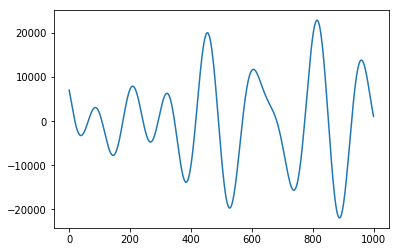

In [28]:
#d) thought you mean sum
mergesig = [*signalCEG,*signalBDG,*signalCEA,*signalCFA]
#merge by extending
#mergesig=signalCEG)
#mergesig.append(signalBDG)
#mergesig.append(signalCEA)
#mergesig.append(signalCFA)
#make sure it's merged
print(max(mergesig))
print(len(mergesig)/len(signalCFA))
#int 16 too small,int 64, need to be scaled
Mwave = np.asarray(mergesig,dtype=np.int16)
wavfile.write("M.wav",fs,Mwave)
plt.plot(mergesig[60000:61000])

In [30]:
#test chord
IPython.display.Audio("M.wav")
#no sound can't use int 64 find another way later, found error

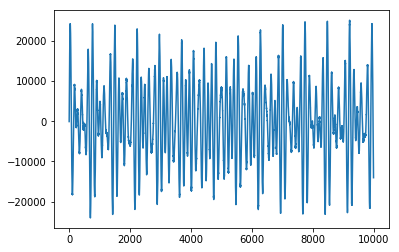

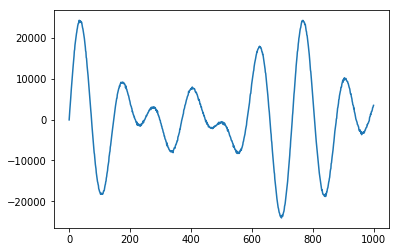

In [31]:
#e)add noise
size = len(mergesig)
noise1 = np.random.normal(0,150,size)
mnsignal = [0]*size
i=0
while i < size:
    mnsignal[i]= mergesig[i] + noise1[i]
    i+=1
    

plt.plot(mnsignal[0:10000])
plt.show()
#noise added, comperison
plt.plot(mnsignal[0:1000])
plt.show(mergesig[0:1000])

In [32]:
MNwave = np.asarray(mnsignal,dtype=np.int16)
wavfile.write("MN.wav",fs,MNwave)
IPython.display.Audio("MN.wav")

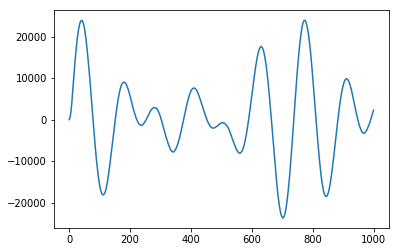

In [33]:
#f) choose square wave
Filter = low_square(11)
waveF = myconvu(MNwave,filter1l)
plt.plot(waveF[0:1000])
#works fine

In [34]:
Fwave = np.asarray(waveF,dtype=np.int16)
wavfile.write("Filtered.wav",fs,MNwave)
IPython.display.Audio("Filtered.wav")

In [41]:
#filter out chords
b, a = signal.butter(4, [330/22000,390/22000], 'band')
ONLYF = signal.filtfilt(b, a, signalCFA)



In [42]:
Fchord = np.asarray(ONLYF,dtype=np.int16)
wavfile.write("FilteredF.wav",fs,Fchord)
IPython.display.Audio("FilteredF.wav")
#sounds about right

In [56]:
#3 cooralation a)
def mycorr(sig1,target):
    limitb = len(sig1)
    limits = len(target)
    out=[0]*len(sig1)
    
    i= 0

    while i < limitb:
        j = 0
        while j < limits:
            #change direction of additon and limit
            if ((i+j)<limitb):
                out[i]+= target[j]*sig1[i+j]
            j+=1
        i+=1
    return out

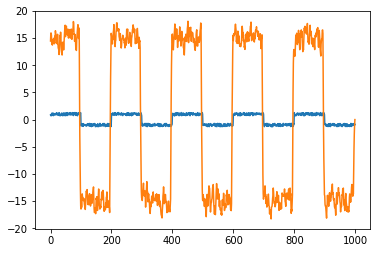

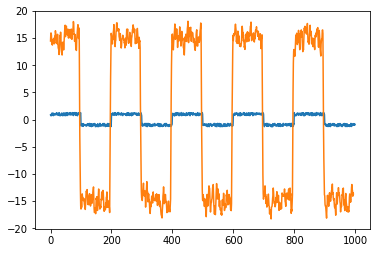

In [48]:
#testing
delta=[0,1,2,3,4,5]

h=mycorr(wave,delta)

plt.plot(wave)
plt.plot(h)
plt.show()
h=np.correlate(wave,delta)
plt.plot(wave)
plt.plot(h)
plt.show()
# looks right

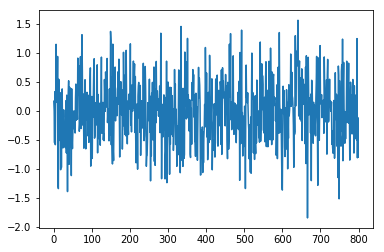

In [54]:
#b)
import matplotlib.pyplot as plt
import numpy as np

signalx= np.genfromtxt("xcor_data.csv", delimiter=",",unpack=True)
plt.plot(signalx)
#data looks fine

In [58]:
#c) find sinc
def find_sinc(length):

    x = np.linspace(-6,6, num =length)
    sinc = np.sinc(x)
    #no need to norm
    return sinc

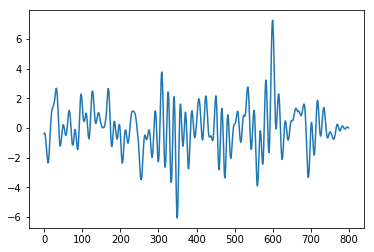

In [63]:
fsinc = mycorr(signalx,find_sinc(81))
plt.plot(fsinc)
#seems to work
#the location direction of the sinc seems to be around 300 upward,350 downward,600 upward

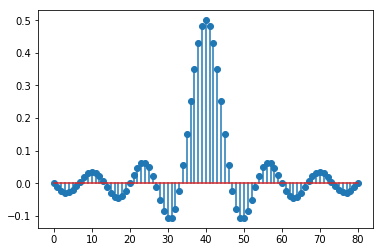

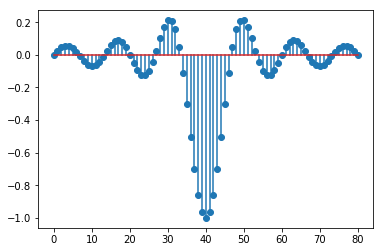

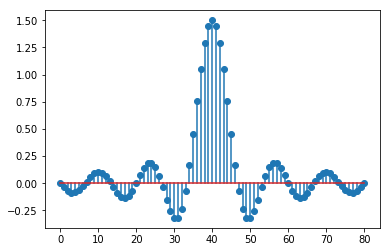

In [65]:
#d)the sinc funtions
x = np.linspace(-6,6, num =81)
sinc = np.sinc(x)
f1= 0.5*sinc
f2= -1*sinc
f3=1.5*sinc

plt.stem(f1)
plt.show()

plt.stem(f2)
plt.show()

plt.stem(f3)
plt.show()